# notMNIST - Input data Pre-Processing

Find and remove all files with zero bytes - linux ***find*** command in bash shell

In [9]:
%%bash
cd /home/jjoravet/Udacity/Deep_Learning/tensorflow/tensorflow/examples/udacity
find . -name "*.png" -size 0 -print -exec rm -f {} \;

./notMNIST_small/F/Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png
./notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png
./notMNIST_large/D/VHJhbnNpdCBCb2xkLnR0Zg==.png
./notMNIST_large/A/Um9tYW5hIEJvbGQucGZi.png
./notMNIST_large/A/SG90IE11c3RhcmQgQlROIFBvc3Rlci50dGY=.png
./notMNIST_large/B/TmlraXNFRi1TZW1pQm9sZEl0YWxpYy5vdGY=.png


Identify and remove files which are not in PNG image format - ImageMagick ***identify*** command

In [10]:
%%bash 
source ~/.bashrc
find . -name "*.png" | xargs identify 2>&1 > /dev/null | grep -v -w -e "PNG" | awk -F"\`" '{print $2}' |\
awk -F"'" '{print $1}' | xargs rm -vf

removed './notMNIST_large/A/RnJlaWdodERpc3BCb29rSXRhbGljLnR0Zg==.png'


Delete duplicate files with ***fdupes*** linux command

In [11]:
%%bash 
### fdupes -r -1 . 2>&1
fdupes -rqdN . 2>&1 | head -30


   [+] ./notMNIST_large/B/SXRjU3ltYm9sLU1lZGl1bS5vdGY=.png
   [-] ./notMNIST_large/B/SVRDU3ltYm9sU3RkLU1lZGl1bS5vdGY=.png


   [+] ./notMNIST_large/B/RXJhcyBCb2xkIEl0YWxpYy50dGY=.png
   [-] ./notMNIST_large/B/VGlsaSBCb2xkIEl0YWxpYy50dGY=.png


   [+] ./notMNIST_large/B/Q2hlbHRlbmhtIEJkSXRIZCBCVCBCb2xkIEl0YWxpYy50dGY=.png
   [-] ./notMNIST_large/B/Q2hlbHRlbmhhbSBCb2xkIEl0YWxpYyBIZWFkbGluZSBCVC50dGY=.png


   [+] ./notMNIST_large/B/Q2FlY2lsaWEtUm9tYW4ub3Rm.png
   [-] ./notMNIST_large/B/Q2FlY2lsaWFMVFN0ZC1Sb21hbi5vdGY=.png
   [-] ./notMNIST_large/B/Q2FlY2lsaWEtUm9tYW5TQy5vdGY=.png
   [-] ./notMNIST_large/B/Q2FlY2lsaWEtUm9tYW5Pc0Yub3Rm.png


   [+] ./notMNIST_large/B/Q2FybWluYSBMaWdodCBCVC50dGY=.png
   [-] ./notMNIST_large/B/Q2FybWluYSBMdCBCVCBMaWdodC50dGY=.png


   [+] ./notMNIST_large/B/TWV0YUJvbGRDRS1JdGFsaWMub3Rm.png
   [-] ./notMNIST_large/B/TWV0YUJvbGRDRUxGLUl0YWxpYy5vdGY=.png
   [-] ./notMNIST_large/B/TWV0YUJvbGRUdXJrLUl0YWxpYy5vdGY=.png
   [-] ./notMNIST_large/B/TWV0YUJvbGRUdXJrTE

Count the number of files in each subdirectory - these should be unique

In [12]:
%%bash
for i in $(find . -maxdepth 2 -mindepth 1 -type d) ; do echo -n $i": " ; (find $i -type f | wc -l) ; done

./notMNIST_small: 15883
./notMNIST_small/H: 1586
./notMNIST_small/G: 1626
./notMNIST_small/E: 1615
./notMNIST_small/C: 1612
./notMNIST_small/J: 1618
./notMNIST_small/D: 1603
./notMNIST_small/F: 1609
./notMNIST_small/A: 1618
./notMNIST_small/I: 1367
./notMNIST_small/B: 1629
./notMNIST_large: 459719
./notMNIST_large/H: 45932
./notMNIST_large/G: 46800
./notMNIST_large/E: 46673
./notMNIST_large/C: 46350
./notMNIST_large/J: 46345
./notMNIST_large/D: 46434
./notMNIST_large/F: 46550
./notMNIST_large/A: 46813
./notMNIST_large/I: 40825
./notMNIST_large/B: 46997
./.ipynb_checkpoints: 2


Display random images in a sub-directory trees - **notMNIST_large** and **notMNIST_small**.  Select 50 random images in each sub-directory to display.  Create two montage images, which show the results.  The images will display for 10 seconds each.

In [13]:
%%bash
bash display_random_images.sh

Here is a listing of the bash script:

```
#! /bin/bash

NUM=50

#Check program options.
while [ X"$1" != X-- ]
do
    case "$1" in
       -n) NUM="$2"
           shift 2
           ;;
   -debug) echo "DEBUG ON"
           set -x
           DEBUG="yes"
           trap '' SIGHUP SIGINT SIGQUIT SIGTERM
           shift 1
           ;;
       -*) echo "${program}: Invalid parameter $1: ignored." 1>&2
           shift
           ;;
        *) set -- -- $@
           ;;
    esac
done
shift           # remove -- of arguments

ls -l | grep '^d' | awk '{print $9}' > directories.lis
while read DIRECTORY; do
   cd ./${DIRECTORY}
   find . -name "temp" -exec rmdir --ignore-fail-on-non-empty {} \;
   ls -l | grep '^d' | awk '{print $9}' > sub_directories.lis
   while read SUB_DIRECTORY; do
      cd ./${SUB_DIRECTORY}
      mkdir temp
      ls | sort -R | tail -${NUM} | while read FILE; do
         cp ${FILE} temp   
      done
      montage -background '#000000' -fill 'gray' -geometry 28x28+4+4 ./temp/*.png montage.png
      cp montage.png ../${SUB_DIRECTORY}.montage.png
      rm -rf temp
      cd ..
   done < sub_directories.lis
   
   montage -border 2 -label '%f' -font Helvetica -pointsize 10 -background '#000000' \
   -fill 'gray' -geometry 240x240+4+4 ?.montage.png ${DIRECTORY}.combined.montages.jpg
     
   display ${DIRECTORY}.combined.montages.jpg &
   find . -name "montage.png" -exec rm -f {} \;
   rm -f ?.montage.png directories.lis sub_directories.lis
   sleep 10
   killall display
   mv ${DIRECTORY}.combined.montages.jpg ..
   cd ..
done < directories.lis
```

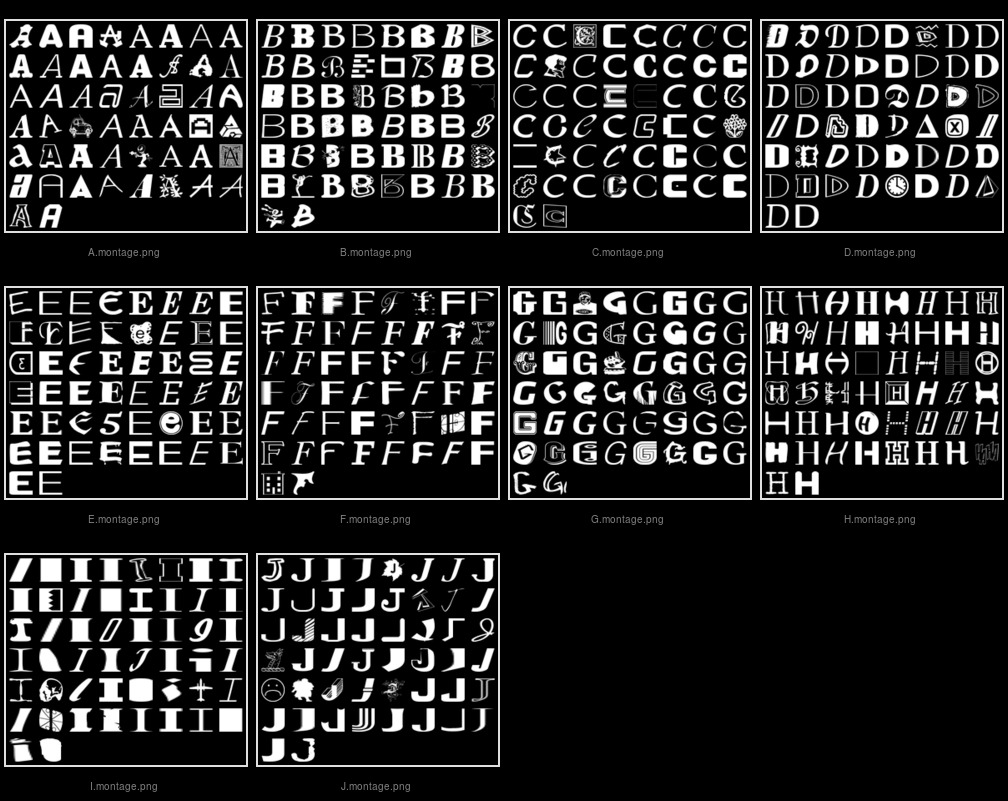

In [14]:
from IPython.display import Image
Image(filename = "notMNIST_large.combined.montages.jpg", width=1024, height=768)

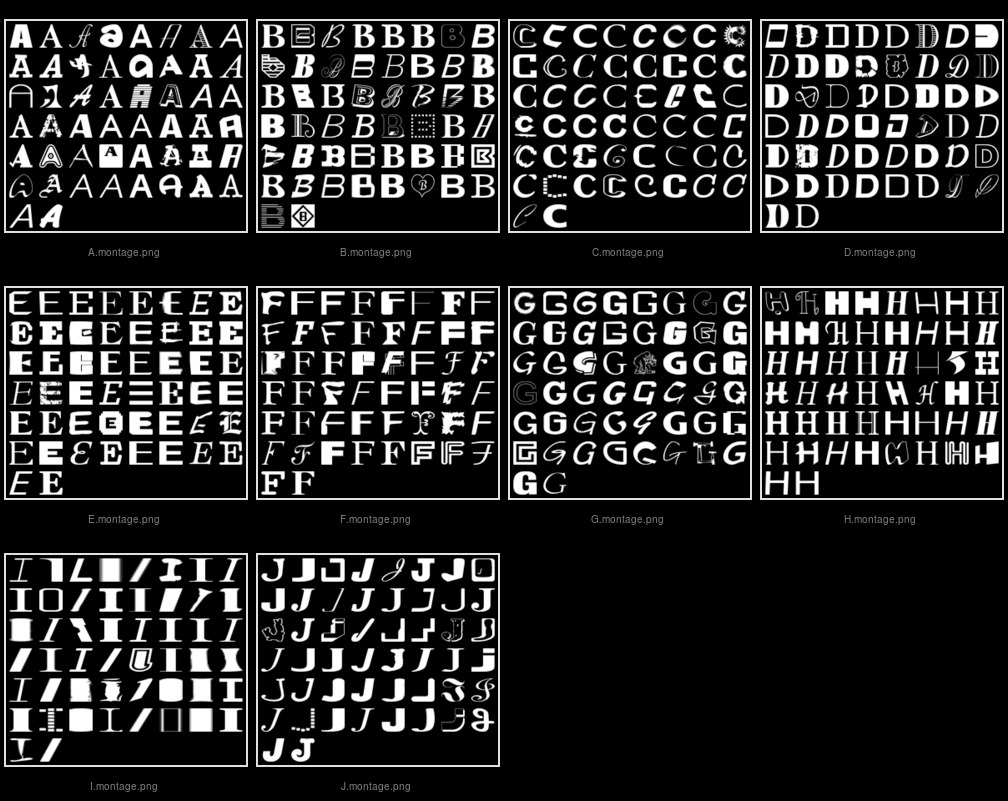

In [15]:
Image(filename = "notMNIST_small.combined.montages.jpg", width=1024, height=768)